# PHYS 598 - Space Physics

## Dr. Emma Spanswick

#### Filobateer Ghaly - 10175960

____

## Anomalies in Prototype Riometer Instrument

### An investigation using HF and VHF ionospheric propagation to describe a sharp absorption peak in both terrestial and sky signals.
___

## Method of Investigation - III

### Ray Tracing - Continued
___
#### Absorption Region 

From **Parts I** and **II**, we were able to observe a few important keypoint:

- The frequencies below ~ 9 MHz are being absorbed somewhere along their journey from **Alert** to **Gillam** according to *Part I*.
- The ray tracing in *Part II* shows rays hitting the riometer from outside the **FOV** *(Cone of View)*, from the side of the riometer.

In the latter, the rays hitting the riometer from the side should still be detected, however are leaving no trace in the spectral plot. These observations tell us that the ionized E-region, highlighted in the figures *(~85 - 105 Km)* is absorbing some of the rays. We already saw that for frequencies above 8 MHz the rays bounce only once before reaching *Gillam*. Our goal now is to make a statement about the size of that absorbing region above *Gillam*. Determining the exact size is a complicated problem and requires more than one transmitter to provide informative feedback about not only the size of the region but its shape as well. Instead, we focus our attention on the minimum size of that region *(assuming a circular radius- for now)*. With some ray-tracing, we would be able to make some statements given the following assumptions:

- *All the absorption must occur in that region and no-where else along the ray's path.*
- *The absorption region isn't changing with time (size and shape).*
- *The rays are following the exact path described in the ray trace (which is based on the IRI model)*
- *The ray used to determine the minimum size of the region is absorbed as soon as it enters the region at ~85 Km altitude.* 

#### Multiple Hops

Since along the path of the rays, we observed that for frequencies lower than 8 Mhz, the ray bounces multiple times before it reaches Gillam, it wouldn't be informative to track down these rays: they could be absorbed anywhere along the path in the parts where they interact with the *E-region*. So instead we focus our attention on the *Single-Hop* profile, determining where exactly along their journey to Gillam (Lattitude) did they interact with the absorbing region.

#### Single-Hop to Elevation Profile

To proceed, we run some new ray traces, now using the exact NRCan transmitter frequencies: $ 5.382, 6.9285, 8.0995, 10.422, 11.107, $ and  $ 14.3704 \  \mathrm{MHz} $ with the goal of finding the rays which reach *Gillam* from outside its *FOV*. To do so, we focus only on the **Single-Hop to Elevation Profile**, shown in the ray traces below: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# A function that reads files and returns three colums of the data
# First col = latitude, 2nd col = longitude, 3rd col = altitude
def Read_3_Column_File(file_name):
    data  = open(file_name, 'r')

    lines = data.readlines()
    
    #Remove first line
    lines.pop(0)
    
    lat = []
    long = []
    alt = []

    for line in lines:

        p = line.split()
        lat.append(float(p[0]))
        long.append(float(p[1]))
        alt.append(float(p[2]))
    data.close()
    return lat, long, alt

# We need an 89 by 89 matrix that would hold the latitudes and one that would hold the altitudes

def GimmeLats_alts(num, name, name2):
    Lats = [[0]*89]*89
    Alts = [[0]*89]*89
    for i in range (0,num-1):
        file_string = 'All_elevations/' + name  + '/rayout_elev'+ str(i) + 'p00deg_' +name2 + '.txt'
        list_lat, list_long, list_alt = np.asarray(Read_3_Column_File(file_string))
        
        Lats[i] = list_lat
        Alts[i] = list_alt

    
    return Lats, Alts
                             

Lats5, Alts5 = GimmeLats_alts(90,     '5MHz', '5382kHz')
Lats6, Alts6 = GimmeLats_alts(90,     '6MHz', '6929kHz')
Lats8, Alts8 = GimmeLats_alts(90,     '8MHz', '8100kHz')
Lats10, Alts10 = GimmeLats_alts(90, '10MHz', '10422kHz')
Lats11, Alts11 = GimmeLats_alts(90, '11MHz', '11107kHz')
Lats14, Alts14 = GimmeLats_alts(90, '14MHz', '14370kHz')

In [24]:
def plot_freq_ax(freq, Lats, Alts, fig = True, axes = None, legend = False):

    if fig: plt.figure(figsize=(14,7))
    ax = plt.gca() if axes is None else axes
    
    for i in range(89):
        ax.plot(Lats[i], Alts[i])
        
    ax.scatter(56.3480, 0, marker = "^", s = 150, label = 'Gillam', color = 'red')
    
    ax.set_ylim(0, 1000)
    ax.set_xlim(50, 82)

    ax.set_title('Single Hop Profile for ' + freq + ' at 15 UT')
    if legend: ax.legend(loc = "best")

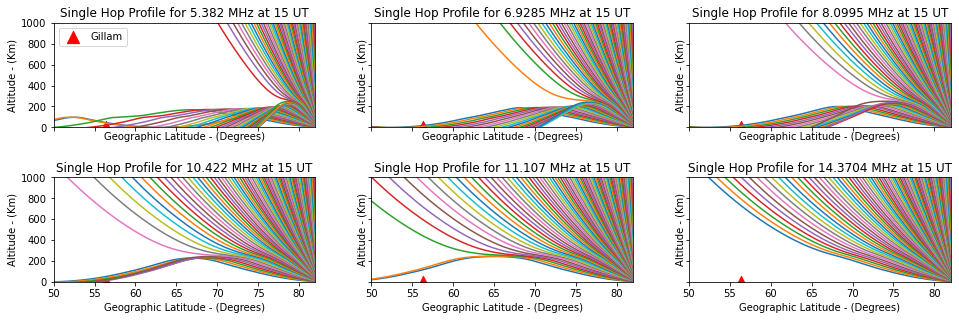

In [20]:
fig, axes = plt.subplots(2,3, figsize=(14,5), sharex = True, sharey = True)
fig.tight_layout(pad=4.0)

plt.setp(axes, xlabel = 'Geographic Latitude - (Degrees)', ylabel = 'Altitude - (Km)' )


plot_freq_ax('5.382 MHz', Lats5, Alts5, fig = False, axes=axes[0,0], legend = True)
plot_freq_ax('6.9285 MHz', Lats6, Alts6, fig = False, axes=axes[0,1])
plot_freq_ax('8.0995 MHz', Lats8, Alts8, fig = False, axes=axes[0,2] )
plot_freq_ax('10.422 MHz', Lats10, Alts10, fig = False, axes=axes[1,0] )
plot_freq_ax('11.107 MHz', Lats11, Alts11, fig = False, axes=axes[1,1] )
plot_freq_ax('14.3704 MHz', Lats14, Alts14, fig = False, axes=axes[1,2] )

From these ray traces, we are only interested in a few, namely the ones below ~9 MHz, since above that frequencies we do see some signal strength in the riometer. It is true that in our search we should narrow down on the exact frequency by performing ray traces all the way up to 9 MHz, but again, the reason behind us choosing these particular bands is that they are known bands that *Alert* transmits at. 

However, with that being said, one can already discard these traces for another reason, which is the fact that they reach Gillam *through* the absorbing region at 10.422 MHz and don't even reach at frequencies above that.
___
Thus now we focus our attention on the first three of those ray-traces and isolate the rays that hit Gillam. We also convert to metric units, which will help us when sizing up the abosrption region. In doing so, we use Gillam as our reference point for convenience.

We are only interested in the region between Alert and Gillam. We lack the information to say anything about the other side of the absorbing region.

In [41]:
ray_at5_lat, ray_at5_long, ray_at5_alt = Read_3_Column_File('rayout_elev4p61deg_5382kHz.txt')
ray_at6_lat, ray_at6_long, ray_at6_alt = Read_3_Column_File('rayout_elev2p70deg_6929kHz.txt')
ray_at8_lat, ray_at8_long, ray_at8_alt = Read_3_Column_File('rayout_elev2p89deg_8100kHz.txt')

In [49]:
ray_at5_lat, ray_at5_long, ray_at5_alt = np.array(ray_at5_lat), np.array(ray_at5_long),np.array( ray_at5_alt) 
ray_at6_lat, ray_at6_long, ray_at6_alt = np.array(ray_at6_lat), np.array(ray_at6_long),np.array( ray_at6_alt)
ray_at8_lat, ray_at8_long, ray_at8_alt = np.array(ray_at8_lat), np.array(ray_at8_long),np.array( ray_at8_alt)

For a frequency of  5.382 MHz the minimum size of the absorbing regions is:    size = 2346.745  Km
For a frequency of  6.9285 MHz the minimum size of the absorbing regions is:    size = 2222.947  Km
For a frequency of  8.0995 MHz the minimum size of the absorbing regions is:    size = 2236.835  Km


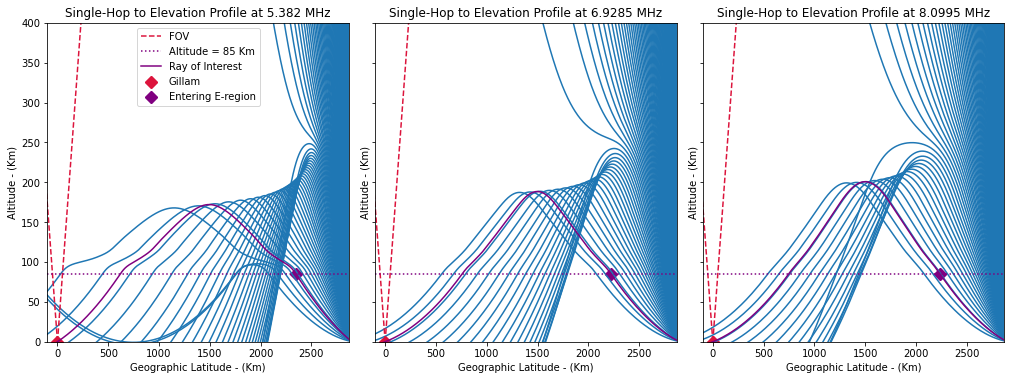

In [145]:
def absorption_trace_ax(name, trace_num, Lats, Alts, int_ray_lat, int_ray_alt, alt_num, legend = False):

    m = np.tan(60 * np.pi /180)
    Gillam = 56.3480*110.574
    
    xmin = -100; xmax = 9100; n_points = 1000;
    
    for i in range(89):
        axes[trace_num].plot(Lats[i]*110.574 - Gillam , Alts[i], color = 'C0')
        
    # Gillam and FOV
    axes[trace_num].scatter(0 , 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'crimson')
    
    linex = np.linspace(0, xmax, n_points)
    liney = m*linex 

    axes[trace_num].plot(linex, liney, color = 'crimson', linestyle  = '--', label = 'FOV')
    axes[trace_num].plot(-linex, liney, color = 'crimson',linestyle =  '--')
    
    # 85 Km
    axes[trace_num].plot(np.linspace(xmin, xmax, n_points) , np.linspace(85, 85, n_points), 
                         color = 'purple', linestyle = ':', label = 'Altitude = 85 Km')
    
    axes[trace_num].plot(int_ray_lat*110.574 - Gillam ,  int_ray_alt, color = 'purple', label = 'Ray of Interest')
    
    
    result = np.where(int_ray_alt == alt_num)
    index = result[0][0]
    
    latitude = int_ray_lat[index]*110.574 - Gillam
    print('For a frequency of ', name,
          'the minimum size of the absorbing regions is:   ', 'size = {:5.7}'.format(latitude), ' Km' )
    

    axes[trace_num].scatter(latitude , 85.1024, marker = 'x', linewidth = 10, label = 'Entering E-region', color = 'purple')
    
    
    axes[trace_num].set_ylim(0, 400)
    axes[trace_num].set_xlim(xmin, xmax - Gillam)
    
    axes[trace_num].set_xlabel('Geographic Latitude - (Km)')
    axes[trace_num].set_ylabel('Altitude - (Km)')
    axes[trace_num].set_title('Single-Hop to Elevation Profile at ' + str(name))
    
    if legend: axes[trace_num].legend(loc = "best")
    

fig, axes = plt.subplots(1, 3, figsize=(14,5), sharex = True, sharey = True)
fig.tight_layout(pad=1.0)

absorption_trace_ax('5.382 MHz', 0, Lats5, Alts5, ray_at5_lat, ray_at5_alt, alt_num = 85.0433, legend = True)
absorption_trace_ax('6.9285 MHz', 1, Lats6, Alts6, ray_at6_lat, ray_at6_alt, alt_num = 85.0483)
absorption_trace_ax('8.0995 MHz', 2, Lats8, Alts8, ray_at8_lat, ray_at8_alt, alt_num = 85.1024)

## Conclusion

The minimum size of the absorption region is in our case defined by the maximum distance from the riometer to the reflection point of a ray that hits Gillam. This means that the ray we are interested in isolating from the ray trace is that which reaches Gillam first. 

Another factor we need to account for to determine the minimum size of the region is that the ray interacts with the region twice before reaching Gillam. We will thus consider the first time it hits the region to be the time it was absorbed, although it could have been absorbed anywhere along the arc of reflection.

From these results we can say that the minimum the absorbing region could be is about ~$~ 2346.745  ~ Km $ given by the ray traced at a frequency of $ 5.382 ~ MHz$.